# L2 Data preprocession
Read data using pandas https://pandas.pydata.org/docs/reference/io.html

In [2]:
with open("data.csv") as f:
    lines = f.readlines()

print (lines)

['treat,before,after,diff\n', 'No treatment,13,16,3\n', 'No treatment, 10,18,8\n', 'No treatment,16,-16,0\n', 'Placebo,16,13,-3']


In [3]:
lines[0].split(",")

['treat', 'before', 'after', 'diff\n']

In [4]:
import pandas as pd
pd.read_csv("data.csv")

,treat,before,after,diff
0,No treatment,13,16,3
1,No treatment,10,18,8
2,No treatment,16,-16,0
3,Placebo,16,13,-3


In [5]:
pd.read_csv("data.tsv",sep='\t')

,Name,Age,Address
0,Rayn,33,1115 W Franklin
1,Paul,25,Big Farm Way
2,Jim,45,W Main St
3,Samantha,32,28 George St


In [6]:
pd.read_json("data.json", orient="index")

,0
firstName,John
lastName,Smith
isAlive,True
age,27
address,"{'streetAddress': '21 2nd Street', 'city': 'Ne..."
phoneNumbers,"[{'type': 'home', 'number': '212 555-1234'}, {..."
children,"[Catherine, Thomas, Trevor]"
spouse,None


In [7]:
data_csv=pd.read_csv("data.csv")
data_csv.to_json(orient="records")

'[{"treat":"No treatment","before":13,"after":16,"diff":3},{"treat":"No treatment","before":10,"after":18,"diff":8},{"treat":"No treatment","before":16,"after":-16,"diff":0},{"treat":"Placebo","before":16,"after":13,"diff":-3}]'

In [8]:
data_csv.to_json(orient="index")

'{"0":{"treat":"No treatment","before":13,"after":16,"diff":3},"1":{"treat":"No treatment","before":10,"after":18,"diff":8},"2":{"treat":"No treatment","before":16,"after":-16,"diff":0},"3":{"treat":"Placebo","before":16,"after":13,"diff":-3}}'

# Data visualization
- Line Charts
- Bar Graphs
- Histograms
- Scatter Plots
- Heat Maps

https://matplotlib.org/stable/api/index

In [9]:
data_csv


,treat,before,after,diff
0,No treatment,13,16,3
1,No treatment,10,18,8
2,No treatment,16,-16,0
3,Placebo,16,13,-3


- Line Charts

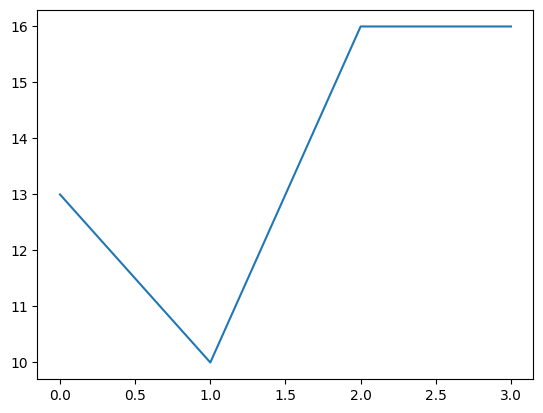

In [10]:
import matplotlib.pyplot as plt
plt.plot(data_csv["before"])

<Axes: >

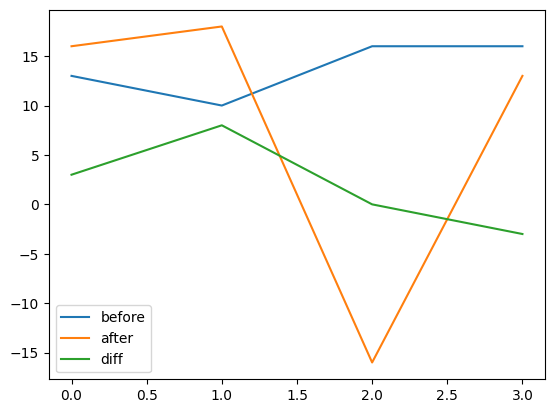

In [11]:
data_csv.plot()

In [12]:
data_csv

,treat,before,after,diff
0,No treatment,13,16,3
1,No treatment,10,18,8
2,No treatment,16,-16,0
3,Placebo,16,13,-3


- Bar Charts

<Axes: >

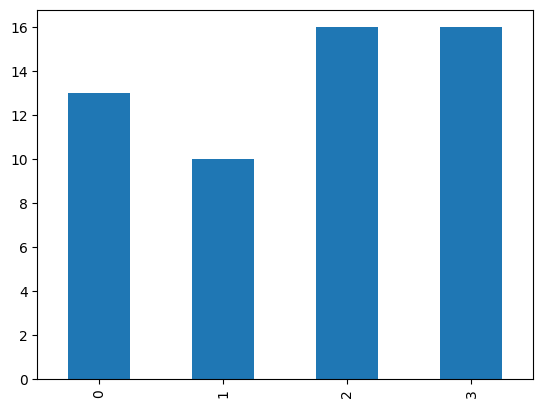

In [13]:
data_csv["before"].plot.bar()

- Histograms


array([[<Axes: title={'center': 'before'}>,
        <Axes: title={'center': 'after'}>],
       [<Axes: title={'center': 'diff'}>, <Axes: >]], dtype=object)

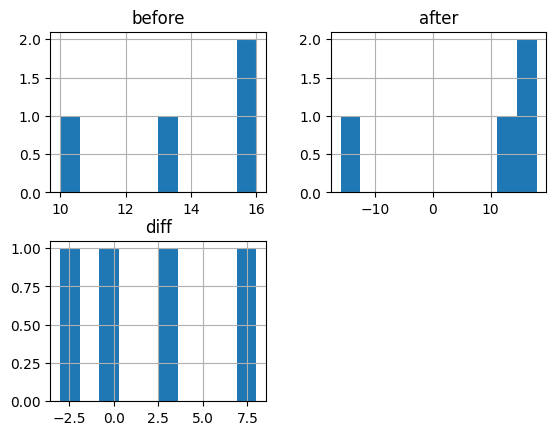

In [14]:
data_csv.hist()

In [15]:
house=pd.read_csv("housing.csv")

In [ ]:
house.head()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

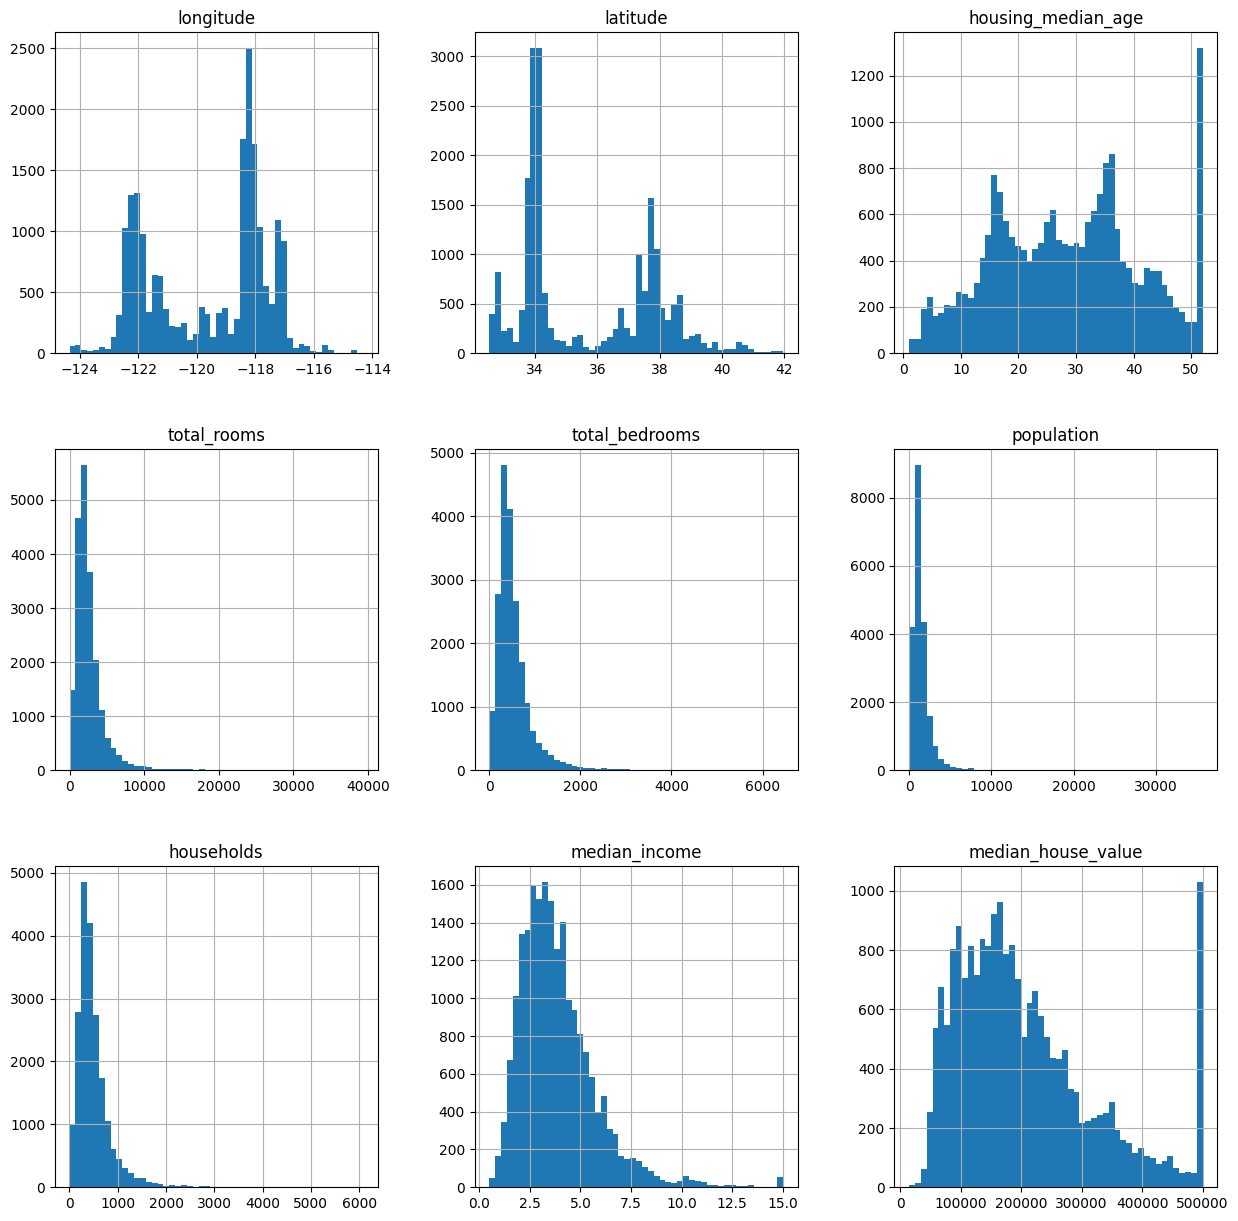

In [16]:
house.hist(bins=50,figsize=(15,15))

- Scatter Plots


<Axes: xlabel='longitude', ylabel='latitude'>

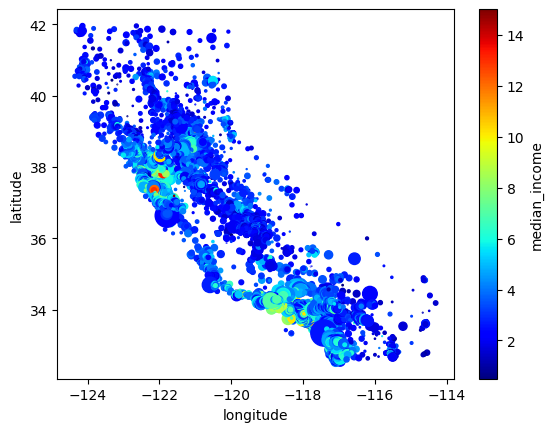

In [17]:
house.plot.scatter(x="longitude", y="latitude",s=house["population"]/100,c="median_income",cmap="jet")


- Heat Maps

In [18]:
data_heat=pd.read_csv("heat.txt")
data_heat

,A,B,C,D,E
0,0.1,0.2,0.3,0.5,0.6
1,0.2,0.2,0.1,0.5,0.6
2,0.6,0.7,0.3,0.5,0.9
3,0.3,0.4,0.3,0.5,0.8


<Axes: >

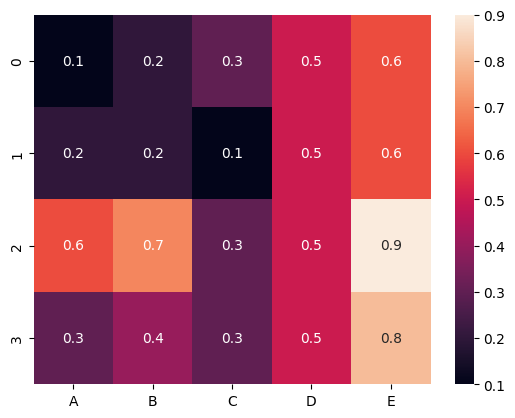

In [20]:
import seaborn as sns
sns.heatmap(data_heat,annot=True)

## Note: try to read the matploylib.pyplot API and plot Bar

# Data Cleaning
- Handling Missing Data
- Smooth Noisy Data

In [22]:
alcohol= pd.read_excel("alcohol.xlsx")
alcohol

,#,Country,Alcohol,Deaths,Heart,Liver,Free healthcare
0,1,Australia,2.50,785,211.0,15.300000,Y
1,2,Austria,3.00,863,167.0,45.599998,Y
2,3,Belg/Lux,2.90,883,131.0,20.700001,N
3,4,Canada,2.40,793,NaN,16.400000,Y
4,5,Denmark,2.90,971,220.0,23.900000,Y
5,6,Finland,0.80,970,297.0,19.000000,N
6,7,France,9.10,751,11.0,37.900002,N
7,8,Iceland,-0.80,743,211.0,11.200000,Y
8,9,Ireland,0.70,1000,300.0,6.500000,Y
9,10,Israel,0.60,-834,183.0,13.700000,Y


In [23]:
alcohol.dropna(axis=1)


,#,Country,Alcohol,Deaths,Free healthcare
0,1,Australia,2.50,785,Y
1,2,Austria,3.00,863,Y
2,3,Belg/Lux,2.90,883,N
3,4,Canada,2.40,793,Y
4,5,Denmark,2.90,971,Y
5,6,Finland,0.80,970,N
6,7,France,9.10,751,N
7,8,Iceland,-0.80,743,Y
8,9,Ireland,0.70,1000,Y
9,10,Israel,0.60,-834,Y


In [24]:
median_heard=alcohol["Heart"].median()
print (median_heard)
alcohol["Heart"].fillna(median_heard, inplace=True)

199.0


In [25]:
alcohol

,#,Country,Alcohol,Deaths,Heart,Liver,Free healthcare
0,1,Australia,2.50,785,211.0,15.300000,Y
1,2,Austria,3.00,863,167.0,45.599998,Y
2,3,Belg/Lux,2.90,883,131.0,20.700001,N
3,4,Canada,2.40,793,199.0,16.400000,Y
4,5,Denmark,2.90,971,220.0,23.900000,Y
5,6,Finland,0.80,970,297.0,19.000000,N
6,7,France,9.10,751,11.0,37.900002,N
7,8,Iceland,-0.80,743,211.0,11.200000,Y
8,9,Ireland,0.70,1000,300.0,6.500000,Y
9,10,Israel,0.60,-834,183.0,13.700000,Y


- Noisy Data

In [26]:
alcohol["Deaths"]<0

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9      True
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
Name: Deaths, dtype: bool

In [27]:
alcohol.loc[alcohol["Deaths"]<=0, "Deaths"]=0
alcohol

,#,Country,Alcohol,Deaths,Heart,Liver,Free healthcare
0,1,Australia,2.50,785,211.0,15.300000,Y
1,2,Austria,3.00,863,167.0,45.599998,Y
2,3,Belg/Lux,2.90,883,131.0,20.700001,N
3,4,Canada,2.40,793,199.0,16.400000,Y
4,5,Denmark,2.90,971,220.0,23.900000,Y
5,6,Finland,0.80,970,297.0,19.000000,N
6,7,France,9.10,751,11.0,37.900002,N
7,8,Iceland,-0.80,743,211.0,11.200000,Y
8,9,Ireland,0.70,1000,300.0,6.500000,Y
9,10,Israel,0.60,0,183.0,13.700000,Y


array([[<Axes: title={'center': '#'}>,
        <Axes: title={'center': 'Alcohol'}>],
       [<Axes: title={'center': 'Deaths'}>,
        <Axes: title={'center': 'Heart'}>],
       [<Axes: title={'center': 'Liver'}>, <Axes: >]], dtype=object)

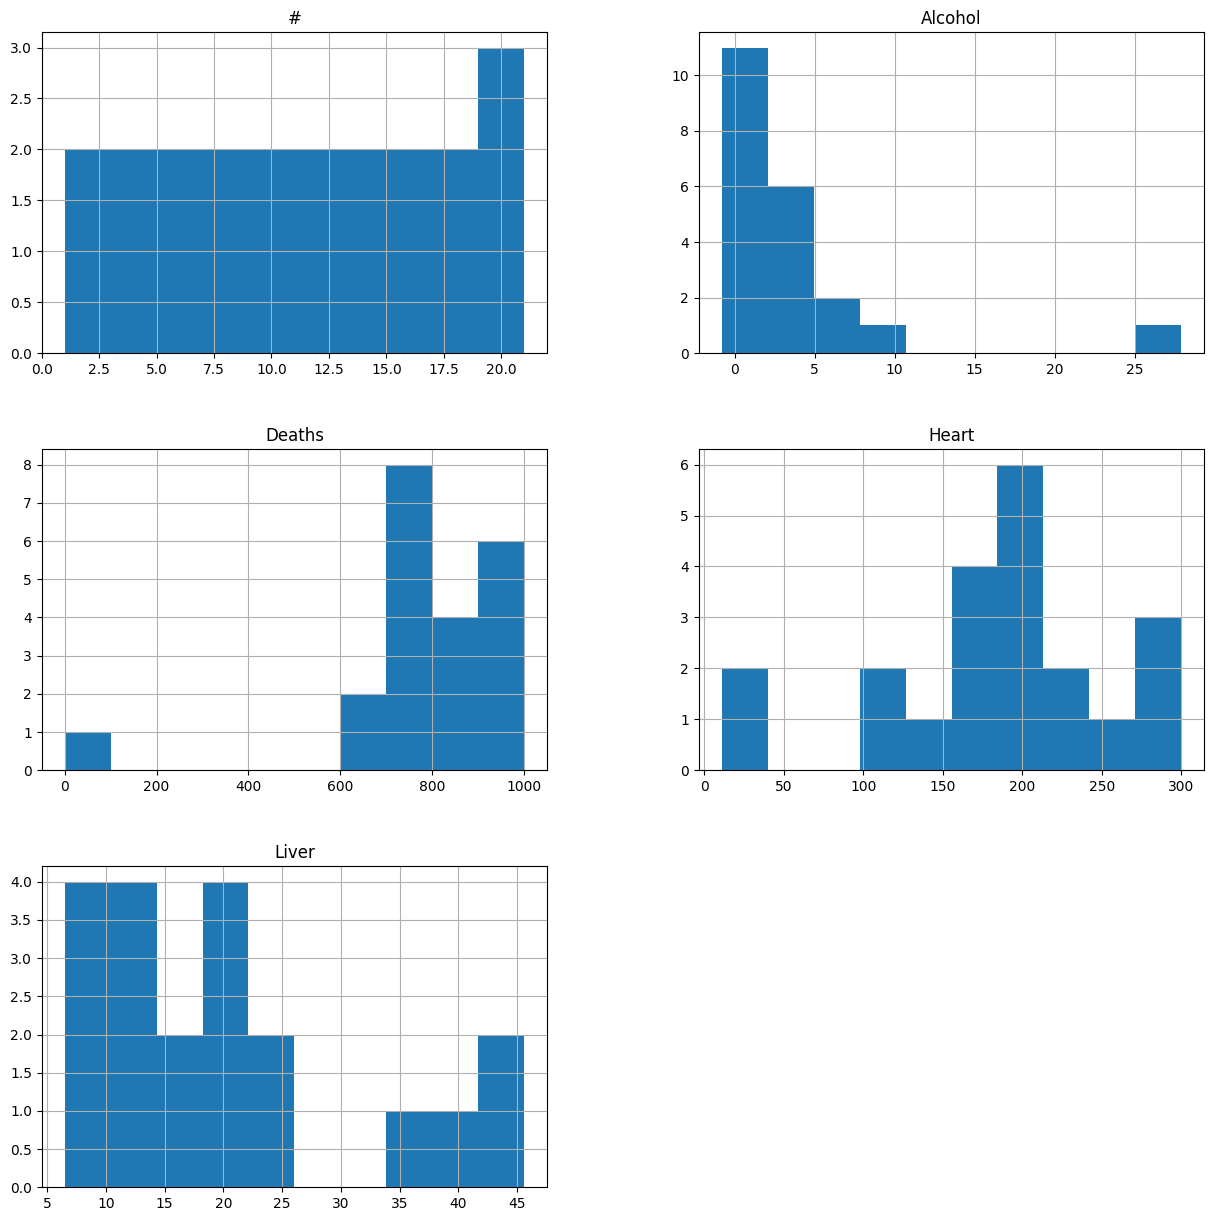

In [29]:
alcohol.hist(figsize=(15,15))

# Transformation

- Encoder

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
cat = alcohol[["Free healthcare"]]

cat_encoded = ordinal_encoder.fit_transform(cat)
cat_encoded

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
cat = alcohol[["Free healthcare"]]

cat_encoded = onehot_encoder.fit_transform(cat)
cat_encoded.toarray()

- Normalization

In [ ]:
alcohol.plot.scatter(x="Heart", y="Liver")

In [ ]:
plt.figure(figsize=(30,4))
plt.scatter(x= alcohol["Heart"], y=alcohol["Liver"] )

In [ ]:
norm_heart = (alcohol["Heart"] - alcohol["Heart"].min()) / (alcohol["Heart"].max() - alcohol["Heart"].min())
norm_liver = (alcohol["Liver"] - alcohol["Liver"].min()) / (alcohol["Liver"].max() - alcohol["Liver"].min())

In [ ]:
plt.scatter(x= norm_heart, y= norm_liver)